# Text Encoding

In [1]:
# Importing Keras library 
from keras.preprocessing.text import text_to_word_sequence as keras_text_to_word_sequence

# Importing nltk library
import nltk
from nltk.tokenize import word_tokenize as nltk_work_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Importing some other supporting libraries 
import pandas as pd

Using TensorFlow backend.


In [2]:
# This is the next we will use for this small encoding experiment 
corpus = [
    "The number of trees in the world, according to a 2015 estimate, is 3.04 trillion.",
    "46% of the trees in the world are in the tropics or sub-tropics.",
    "20% of the trees in the world are in the temperate zones.",
    "24% of threes in the world are in the coniferous boreal forests.",
    "There about 15 billion trees are cut down annually.",
    "There about 5 billion trees are planted annually.",
]

# Feature Extractions

## <font color='blue'> Step 1. Tokenize the datasets seperating words in each sentence. </font>

In [3]:
# Extracting the tokens using Keras
ks_tokens = []
for text in corpus: 
    ks_tokens.append(keras_text_to_word_sequence(text))
print(ks_tokens)

[['the', 'number', 'of', 'trees', 'in', 'the', 'world', 'according', 'to', 'a', '2015', 'estimate', 'is', '3', '04', 'trillion'], ['46', 'of', 'the', 'trees', 'in', 'the', 'world', 'are', 'in', 'the', 'tropics', 'or', 'sub', 'tropics'], ['20', 'of', 'the', 'trees', 'in', 'the', 'world', 'are', 'in', 'the', 'temperate', 'zones'], ['24', 'of', 'threes', 'in', 'the', 'world', 'are', 'in', 'the', 'coniferous', 'boreal', 'forests'], ['there', 'about', '15', 'billion', 'trees', 'are', 'cut', 'down', 'annually'], ['there', 'about', '5', 'billion', 'trees', 'are', 'planted', 'annually']]


In [4]:
ks_tokens

[['the',
  'number',
  'of',
  'trees',
  'in',
  'the',
  'world',
  'according',
  'to',
  'a',
  '2015',
  'estimate',
  'is',
  '3',
  '04',
  'trillion'],
 ['46',
  'of',
  'the',
  'trees',
  'in',
  'the',
  'world',
  'are',
  'in',
  'the',
  'tropics',
  'or',
  'sub',
  'tropics'],
 ['20',
  'of',
  'the',
  'trees',
  'in',
  'the',
  'world',
  'are',
  'in',
  'the',
  'temperate',
  'zones'],
 ['24',
  'of',
  'threes',
  'in',
  'the',
  'world',
  'are',
  'in',
  'the',
  'coniferous',
  'boreal',
  'forests'],
 ['there',
  'about',
  '15',
  'billion',
  'trees',
  'are',
  'cut',
  'down',
  'annually'],
 ['there', 'about', '5', 'billion', 'trees', 'are', 'planted', 'annually']]

In [5]:
# Extracting the tokens using NLTK
# We need to serialize the text to splits the works into tokens
nltk_tokens = [] 
for text in corpus:
    pre_text = pd.Series(text).str.cat(sep=' ')
    nltk_tokens.append(word_tokenize(pre_text))
print(nltk_tokens)

NameError: name 'word_tokenize' is not defined

## <font color='blue'> Step 2. Remove the stop words. </font>

In [ ]:
# Retriving the stop words from the library 
stop_words = set(stopwords.words('english'))
# Examples of some stop words
list(stop_words)[0:10]

In [ ]:
for i in range(0, len(ks_tokens)): 
    ks_tokens[i] = [w for w in pd.Series(ks_tokens[i]) if not w in stop_words]
ks_tokens

In [ ]:
# Unlike the list generated by Keras libary, here we have to make sure all tokens are either capitalized or in lower case.
for i in range(0, len(nltk_tokens)): 
    nltk_tokens[i] = [tok.lower() for tok in nltk_tokens[i]]
    nltk_tokens[i] = [w for w in nltk_tokens[i] if not w in stop_words]
nltk_tokens

## <font color='blue'> Step 3. Stemming the tokens, bringing each word to its root. </font>

In [ ]:
# We will use Porter algorithm to reduce the words. Porter has 5 phases of word reductions: 
porter = PorterStemmer()
print(porter.stem('Eating'))
print(porter.stem('running'))

In [ ]:
for tokens in ks_tokens:
    for i in range(0, len(tokens)):    
        tokens[i] = porter.stem(tokens[i])
print(ks_tokens)

In [ ]:
for tokens in nltk_tokens:
    for i in range (0,len(tokens)):    
        tokens[i] = porter.stem(tokens[i])
print(nltk_tokens)

## <font color='blue'> Step 4. Remove punctuations, special characters, and words which have length equal to 1. </font>

In [ ]:
for i in range(0, len(ks_tokens)):
    new_ks_tokens = []
    for tok in ks_tokens[i]: 
        tok = tok.translate(str.maketrans('', '', string.punctuation))
        if tok != "" and len(tok) > 1 and (tok.isnumeric()==False):
            new_ks_tokens.append(tok)
    ks_tokens[i] = new_ks_tokens
print(ks_tokens)

In [ ]:
for sentences in ks_tokens: 
    print(sentences)

# Text Encoding

In [6]:
from keras.preprocessing.text import Tokenizer

In [7]:
# First step is to get an instance of the tokenizer class
tok = Tokenizer()
# Keras can fit our corpus in a single call
tok.fit_on_texts(corpus)

In [8]:
# Let's explore what is the content of the tokenized corpus
print('The frequency of each word in the corpus:')
print(tok.word_counts)

The frequency of each word in the corpus:
OrderedDict([('the', 10), ('number', 1), ('of', 4), ('trees', 5), ('in', 7), ('world', 4), ('according', 1), ('to', 1), ('a', 1), ('2015', 1), ('estimate', 1), ('is', 1), ('3', 1), ('04', 1), ('trillion', 1), ('46', 1), ('are', 5), ('tropics', 2), ('or', 1), ('sub', 1), ('20', 1), ('temperate', 1), ('zones', 1), ('24', 1), ('threes', 1), ('coniferous', 1), ('boreal', 1), ('forests', 1), ('there', 2), ('about', 2), ('15', 1), ('billion', 2), ('cut', 1), ('down', 1), ('annually', 2), ('5', 1), ('planted', 1)])


In [9]:
print('The number of sentences in the corpus:')
print(tok.document_count)

The number of sentences in the corpus:
6


In [10]:
corpus

['The number of trees in the world, according to a 2015 estimate, is 3.04 trillion.',
 '46% of the trees in the world are in the tropics or sub-tropics.',
 '20% of the trees in the world are in the temperate zones.',
 '24% of threes in the world are in the coniferous boreal forests.',
 'There about 15 billion trees are cut down annually.',
 'There about 5 billion trees are planted annually.']

In [11]:
print('The index of each extracted tokens:')
print(tok.word_index)

The index of each extracted tokens:
{'the': 1, 'in': 2, 'trees': 3, 'are': 4, 'of': 5, 'world': 6, 'tropics': 7, 'there': 8, 'about': 9, 'billion': 10, 'annually': 11, 'number': 12, 'according': 13, 'to': 14, 'a': 15, '2015': 16, 'estimate': 17, 'is': 18, '3': 19, '04': 20, 'trillion': 21, '46': 22, 'or': 23, 'sub': 24, '20': 25, 'temperate': 26, 'zones': 27, '24': 28, 'threes': 29, 'coniferous': 30, 'boreal': 31, 'forests': 32, '15': 33, 'cut': 34, 'down': 35, '5': 36, 'planted': 37}


In [12]:
print('The appearnce of each words in sentences:')
print(tok.word_docs)

The appearnce of each words in sentences:
defaultdict(<class 'int'>, {'number': 1, '2015': 1, '04': 1, 'to': 1, 'is': 1, 'of': 4, 'a': 1, 'estimate': 1, '3': 1, 'in': 4, 'world': 4, 'trillion': 1, 'according': 1, 'trees': 5, 'the': 4, 'are': 5, 'or': 1, '46': 1, 'sub': 1, 'tropics': 1, '20': 1, 'zones': 1, 'temperate': 1, '24': 1, 'boreal': 1, 'coniferous': 1, 'forests': 1, 'threes': 1, 'annually': 2, 'down': 1, '15': 1, 'there': 2, 'cut': 1, 'about': 2, 'billion': 2, 'planted': 1, '5': 1})


In [13]:
tok.word_index

{'the': 1,
 'in': 2,
 'trees': 3,
 'are': 4,
 'of': 5,
 'world': 6,
 'tropics': 7,
 'there': 8,
 'about': 9,
 'billion': 10,
 'annually': 11,
 'number': 12,
 'according': 13,
 'to': 14,
 'a': 15,
 '2015': 16,
 'estimate': 17,
 'is': 18,
 '3': 19,
 '04': 20,
 'trillion': 21,
 '46': 22,
 'or': 23,
 'sub': 24,
 '20': 25,
 'temperate': 26,
 'zones': 27,
 '24': 28,
 'threes': 29,
 'coniferous': 30,
 'boreal': 31,
 'forests': 32,
 '15': 33,
 'cut': 34,
 'down': 35,
 '5': 36,
 'planted': 37}

### <font color='green'> Approach #1: One Hot Encoding </font>

In [19]:
tok.word_index

{'the': 1,
 'in': 2,
 'trees': 3,
 'are': 4,
 'of': 5,
 'world': 6,
 'tropics': 7,
 'there': 8,
 'about': 9,
 'billion': 10,
 'annually': 11,
 'number': 12,
 'according': 13,
 'to': 14,
 'a': 15,
 '2015': 16,
 'estimate': 17,
 'is': 18,
 '3': 19,
 '04': 20,
 'trillion': 21,
 '46': 22,
 'or': 23,
 'sub': 24,
 '20': 25,
 'temperate': 26,
 'zones': 27,
 '24': 28,
 'threes': 29,
 'coniferous': 30,
 'boreal': 31,
 'forests': 32,
 '15': 33,
 'cut': 34,
 'down': 35,
 '5': 36,
 'planted': 37}

In [14]:
print(tok.texts_to_matrix(corpus, mode='binary'))

[[0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]]


### <font color='green'> Approach #2: Frequency Encoding </font>

In [15]:
# Encoding the frequency of each word in the sentence
print(tok.texts_to_matrix(corpus, mode='count'))

[[0. 2. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 3. 2. 1. 1. 1. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 3. 2. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 2. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]]


### <font color='green'> Approach #3: TF-IDF </font>

In [20]:
# Encoding the frequency of each word in the sentence (TFIDF)
print(tok.texts_to_matrix(corpus, mode='tfidf'))

[[0.         1.33497436 0.78845736 0.69314718 0.         0.78845736
  0.78845736 0.         0.         0.         0.         0.
  1.38629436 1.38629436 1.38629436 1.38629436 1.38629436 1.38629436
  1.38629436 1.38629436 1.38629436 1.38629436 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         1.65466631 1.33497436 0.69314718 0.69314718 0.78845736
  0.78845736 2.34720039 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         1.38629436 1.38629436
  1.38629436 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         1.65466631 1.33497436 0.69314718 0.69314718 0.78845736
  0.78845736 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.      

In [16]:
# Encoding the frequency of each word in the sentence
print(tok.texts_to_matrix(corpus, mode='freq'))

[[0.         0.125      0.0625     0.0625     0.         0.0625
  0.0625     0.         0.         0.         0.         0.
  0.0625     0.0625     0.0625     0.0625     0.0625     0.0625
  0.0625     0.0625     0.0625     0.0625     0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.21428571 0.14285714 0.07142857 0.07142857 0.07142857
  0.07142857 0.14285714 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.07142857 0.07142857
  0.07142857 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.25       0.16666667 0.08333333 0.08333333 0.08333333
  0.08333333 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.   

# Word2Vec

In [17]:
import gensim 
from gensim.models import Word2Vec

# Building a word2vec model typically is very expensive, so we need to keep in mind the multiprocessing 
# approach option
import multiprocessing
cores = multiprocessing.cpu_count()

In [21]:
# Parameters
# size (int, optional) – Dimensionality of the word vectors.
# window (int, optional) – Maximum distance between the current and predicted word within a sentence.
# min_count (int, optional) – Ignores all words with total frequency lower than this.
# workers (int, optional) – Use these many worker threads to train the model (=faster training with multicore machines).
model = gensim.models.Word2Vec (ks_tokens, window=10, size=150, min_count=1,workers=10)

/Users/mohammedalhamid/anaconda3/lib/python3.6/site-packages/gensim/models/base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [22]:
model.wv.vocab

{'the': <gensim.models.keyedvectors.Vocab at 0x7f7ef55cdc88>,
 'number': <gensim.models.keyedvectors.Vocab at 0x7f7ef55cd9e8>,
 'of': <gensim.models.keyedvectors.Vocab at 0x7f7ef55cda20>,
 'trees': <gensim.models.keyedvectors.Vocab at 0x7f7ef55cdac8>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7f7ef55cdba8>,
 'world': <gensim.models.keyedvectors.Vocab at 0x7f7ef5351e10>,
 'according': <gensim.models.keyedvectors.Vocab at 0x7f7ef5351dd8>,
 'to': <gensim.models.keyedvectors.Vocab at 0x7f7ef5351eb8>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7f7ef5351b38>,
 '2015': <gensim.models.keyedvectors.Vocab at 0x7f7ef5351e80>,
 'estimate': <gensim.models.keyedvectors.Vocab at 0x7f7ef5351d30>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7f7ef5351ba8>,
 '3': <gensim.models.keyedvectors.Vocab at 0x7f7ef5351c18>,
 '04': <gensim.models.keyedvectors.Vocab at 0x7f7ef5351ef0>,
 'trillion': <gensim.models.keyedvectors.Vocab at 0x7f7f30a35048>,
 '46': <gensim.models.keyedvectors.Vocab at 0x7f7f30a35

In [24]:
print(model['trees'])

[-1.2768597e-03 -7.1223371e-04  1.0223117e-03  1.5205981e-03
 -2.2384352e-03 -2.9798578e-03 -1.8605036e-03 -1.0264586e-03
 -2.5701555e-03  1.7182934e-03  1.9989815e-03 -1.7163642e-03
  1.4046020e-03 -1.6686457e-03  1.5335247e-03  1.1284564e-04
 -1.3564915e-03  5.3642801e-04 -1.0654157e-03  1.7774466e-03
  9.3370193e-04 -2.5909168e-03 -2.6902456e-03 -2.1321683e-03
 -3.0849969e-03 -3.0688944e-04 -2.2166966e-04  1.4925805e-03
  1.2327394e-03  1.4189122e-03 -2.9984657e-03 -7.5171993e-04
  1.1296982e-05  7.2306560e-05 -1.7647851e-03 -2.3383209e-03
 -3.1964718e-03  2.9406094e-03 -2.4661848e-03 -1.1274045e-03
  2.3485261e-03 -7.9430989e-04 -2.9581569e-03  8.2155387e-04
 -2.2819913e-03  4.8994576e-04 -2.6002242e-03 -1.1218421e-05
  1.2522083e-03 -2.8052041e-03  1.2810659e-03 -7.7575067e-04
  6.0303172e-04  5.7160185e-04  5.1968422e-04 -1.3120384e-03
 -7.9106650e-04 -2.5629820e-03 -2.9044622e-03  2.6129219e-03
  3.1361757e-03  2.2932722e-03 -2.5443030e-03 -2.3333787e-03
 -1.0121641e-03  9.85819

/Users/mohammedalhamid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


### <font color='blue'> Loading and using a pretrained model </font>

In [41]:
import numpy as np
from scipy import spatial

In [30]:
embeddings_dict = {}
with open("models/glove.6B.50d.txt", "r") as file:
    for line in file: 
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [34]:
print('The length of the dictionary =', len(embeddings_dict.keys()))
print('The length of each word vector=', len(embeddings_dict[list(embeddings_dict.keys())[0]]))

The length of the dictionary = 400000
The length of each word vector= 50


In [43]:
def find_closest_embeddings(embedding): 
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

In [44]:
word = 'book'
find_closest_embeddings(embeddings_dict[word])[:10]

['book',
 'books',
 'story',
 'biography',
 'novel',
 'writing',
 'wrote',
 'author',
 'titled',
 'published']

In [58]:
embeddings_dict[word]

array([-0.0076543,  0.93456  , -0.73189  , -0.55162  ,  0.76977  ,
        0.35925  , -1.1365   , -1.1632   ,  0.34214  ,  0.29145  ,
       -0.8711   ,  0.9197   , -0.47069  , -0.22834  ,  1.4777   ,
       -0.81714  , -0.17466  , -0.51093  , -0.28354  ,  0.23292  ,
        0.71832  ,  0.23414  ,  0.49443  ,  0.35483  ,  0.76889  ,
       -1.4374   , -1.7457   , -0.28994  , -0.10156  , -0.36959  ,
        2.5502   , -1.0581   , -0.049416 , -0.25524  , -0.63303  ,
        0.02671  , -0.18733  ,  0.20206  , -0.26288  , -0.41418  ,
        0.83473  , -0.14227  , -0.28125  ,  0.098155 , -0.17096  ,
        0.52408  ,  0.31851  , -0.089847 , -0.27223  , -0.0088736],
      dtype=float32)

### <font color='blue'> Visualizing the vector space </font>

In [46]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

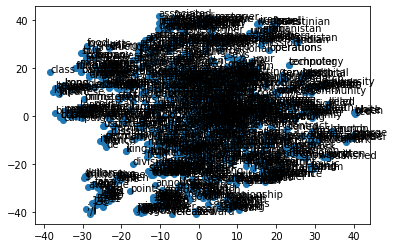

In [49]:
tsne = TSNE(n_components=2, random_state=0)
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]
Y = tsne.fit_transform(vectors[:1000])
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

### <font color='blue'> Measuring the vectors distance </font>

In [61]:
import math

#### Using Euclidean distance 

In [66]:
# Example 1 
x = embeddings_dict['book']
y = embeddings_dict['notebook']
print(math.sqrt(sum([(a - b) ** 2 for a, b in zip(x, y)])))

5.506975291916892


In [65]:
# Example 2
x = embeddings_dict['king']
y = embeddings_dict['queen']
print(math.sqrt(sum([(a - b) ** 2 for a, b in zip(x, y)])))

3.477756223276628


#### Using Cosine Similarity  

In [68]:
from sklearn.metrics import pairwise

In [76]:
x = embeddings_dict['book']
y = embeddings_dict['notebook']
spatial.distance.cosine(x,y)

0.6004519462585449

In [75]:
x = embeddings_dict['king']
y = embeddings_dict['queen']
spatial.distance.cosine(x,y)

0.2160956859588623